In [8]:
import pandas as pd 
import numpy as np
import nlp.wordbags as wb 
from nlp.word2vec import Word2WordPrediction
from nlp.w2w_readers import WordEmbeddings
import pickle


## Esempio minimo di Word2Vec sia come predittore che come embedding 

In [9]:
corpus = [
    ['montagna', 'neve', 'ghiaccio', 'vetta', 'bosco', 'freddo'],
    ['spiaggia', 'sabbia', 'mare', 'onda', 'sole', 'caldo'],
    ['deserto', 'duna', 'cactus', 'sabbia', 'sole', 'arido'],
    ['foresta', 'tropicale', 'liana', 'sole', 'umido', 'caldo'],
    ['lago', 'abete', 'vento', 'neve', 'bosco', 'freddo'],
    ['ghiaccio', 'artico', 'tormenta', 'neve', 'iceberg', 'gelido'],
    ['duna', 'oasi', 'deserto', 'cactus', 'arido']
]

In [10]:
bow = wb.Bow(corpus=corpus)
data_loader, inputs, outputs = bow.one_hot_skip_gram_dataloader(window=4, batch=2)

In [11]:
for doc in corpus:
    print(" | ".join(doc))

montagna | neve | ghiaccio | vetta | bosco | freddo
spiaggia | sabbia | mare | onda | sole | caldo
deserto | duna | cactus | sabbia | sole | arido
foresta | tropicale | liana | sole | umido | caldo
lago | abete | vento | neve | bosco | freddo
ghiaccio | artico | tormenta | neve | iceberg | gelido
duna | oasi | deserto | cactus | arido


## Predittore semplice

### Initialize and training the model

In [12]:
w2w = Word2WordPrediction(input_dim=bow.size, hidden_dim=2)
epochs = 150
learning_rate = 0.001
history = w2w.train(data_loader=data_loader, epochs=epochs, 
                    learning_rate=learning_rate)
print(history[0], history[-1])

100%|██████████| 150/150 [00:00<00:00, 326.43it/s]

15.232723735627674 14.748840059552874


In [13]:
model = WordEmbeddings(words=bow, model=w2w)

### Predizione

In [14]:
search = 'deserto'
y_pred = model.predict(search, topk=10)
y_pred

sole         0.326107
cactus       0.163339
duna         0.117937
deserto      0.058807
sabbia       0.052106
oasi         0.048935
arido        0.041441
onda         0.016155
tropicale    0.014415
foresta      0.013401
dtype: float32

### Pseudo generazione

In [15]:
start = "iceberg"
testo = [start]
for i in range(6):
    p = model.predict(start)
    next_word = np.random.choice(p.index.values, p=p.values / p.values.sum())
    testo.append(next_word)
    start = next_word

In [16]:
testo

['iceberg', 'neve', 'bosco', 'neve', 'abete', 'neve', 'neve']

### Embeddings

In [17]:
model[search]
model['montagna']

array([-0.9631294,  1.0278589], dtype=float32)

In [18]:
search = "deserto"
y_sim = model.most_similar(search, topk=10)
y_sim

deserto     1.000000
duna        0.893275
arido       0.856251
cactus      0.849513
oasi        0.795002
liana       0.689221
umido       0.674399
onda        0.658475
caldo       0.643455
spiaggia    0.639976
Name: deserto, dtype: float32

## Compositionality

In [22]:
model.search(positive=['sole', 'spiaggia'])

mare         0.990437
tropicale    0.982752
foresta      0.972770
sabbia       0.971679
spiaggia     0.964540
caldo        0.963333
onda         0.957835
umido        0.951480
liana        0.945050
sole         0.854058
dtype: float32

In [23]:
model.search(positive=['sole'], negative=['spiaggia'])

neve        0.997008
vento       0.895885
freddo      0.858288
lago        0.846486
ghiaccio    0.842669
vetta       0.833886
montagna    0.833369
iceberg     0.825694
bosco       0.789342
artico      0.765373
dtype: float32

In [25]:
model.search(positive=['deserto', 'mare'], negative=['duna'])

cactus       0.999451
duna         0.992487
liana        0.975567
umido        0.970915
onda         0.965580
caldo        0.960244
spiaggia     0.958968
sabbia       0.950487
foresta      0.949028
tropicale    0.932848
dtype: float32

In [24]:
answer, a_vector = model.analogy('deserto', 'duna', 'mare')
print(answer)

cactus


In [26]:
model.common_meanings(words=['bosco', 'foresta', 'montagna', 'freddo'])

iceberg     0.999937
montagna    0.999688
vetta       0.999664
ghiaccio    0.999116
lago        0.998791
bosco       0.998728
freddo      0.997427
artico      0.996081
gelido      0.993726
vento       0.988735
dtype: float32

In [27]:
model.spot_odd_one(words=['montagna', 'vetta', 'ghiaccio', 'sabbia'])

sabbia     -0.998278
ghiaccio    0.999428
vetta       0.999843
montagna    0.999859
dtype: float32

In [ ]:
model.search(positive=['deserto', 'mare'], negative=['duna'])

In [ ]:
model.search(positive=['mare'], negative=['caldo'])

In [1]:
import matplotlib.pyplot as plt

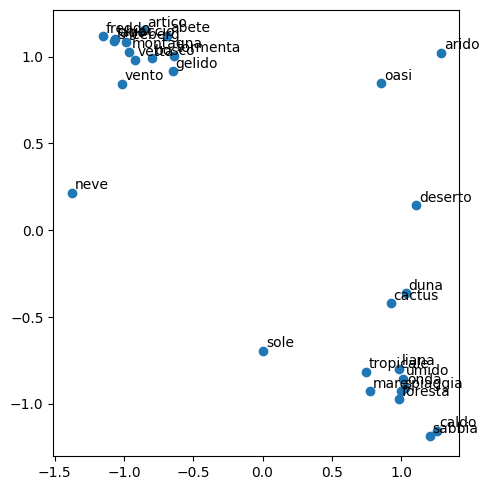

In [21]:
selected_words = bow.vocabulary
indexes = [bow.word2idx[w] for w in selected_words]
selected2d = model.vectors(selected_words)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(selected2d[:,0], selected2d[:, 1])
for i, w in enumerate(selected_words):
    ax.text(selected2d[i][0] + .02, selected2d[i][1] + .02, w)
plt.tight_layout()
plt.show()